In [162]:
import pandas as pd
import numpy as np
import sklearn
from sklearn.preprocessing import StandardScaler,LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, confusion_matrix

In [163]:
test= pd.read_csv('SalaryData_Test(1).csv')
train=pd.read_csv('SalaryData_Train(1).csv')

In [164]:
test.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K


In [165]:
train.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


### EDA 

In [166]:
#Checking for null values
test.isnull().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

In [167]:
train.isnull().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

In [168]:
print('-----------Test Data Salary Count-----------')
print(test['Salary'].value_counts())
print('-----------Train Data Salary Count-----------')
print(train['Salary'].value_counts())

-----------Test Data Salary Count-----------
 <=50K    11360
 >50K      3700
Name: Salary, dtype: int64
-----------Train Data Salary Count-----------
 <=50K    22653
 >50K      7508
Name: Salary, dtype: int64


In [169]:
train.dtypes

age               int64
workclass        object
education        object
educationno       int64
maritalstatus    object
occupation       object
relationship     object
race             object
sex              object
capitalgain       int64
capitalloss       int64
hoursperweek      int64
native           object
Salary           object
dtype: object

In [170]:
test.dtypes

age               int64
workclass        object
education        object
educationno       int64
maritalstatus    object
occupation       object
relationship     object
race             object
sex              object
capitalgain       int64
capitalloss       int64
hoursperweek      int64
native           object
Salary           object
dtype: object

In [171]:
print('-----------Categorical data in Test data-----------')
print(test.select_dtypes(include='object').columns)
print('-----------Categorical data in Train data-----------')
print(train.select_dtypes(include='object').columns)

-----------Categorical data in Test data-----------
Index(['workclass', 'education', 'maritalstatus', 'occupation', 'relationship',
       'race', 'sex', 'native', 'Salary'],
      dtype='object')
-----------Categorical data in Train data-----------
Index(['workclass', 'education', 'maritalstatus', 'occupation', 'relationship',
       'race', 'sex', 'native', 'Salary'],
      dtype='object')


In [172]:
print(test['workclass'].value_counts())

 Private             11021
 Self-emp-not-inc     1297
 Local-gov            1033
 State-gov             667
 Self-emp-inc          572
 Federal-gov           463
 Without-pay             7
Name: workclass, dtype: int64


In [173]:
print(test['education'].value_counts())

 HS-grad         4943
 Some-college    3221
 Bachelors       2526
 Masters          887
 Assoc-voc        652
 11th             571
 Assoc-acdm       499
 10th             403
 7th-8th          266
 Prof-school      243
 9th              221
 12th             200
 Doctorate        169
 5th-6th          161
 1st-4th           71
 Preschool         27
Name: education, dtype: int64


In [174]:
print(test['occupation'].value_counts())

 Exec-managerial      1992
 Craft-repair         1990
 Prof-specialty       1970
 Sales                1824
 Adm-clerical         1819
 Other-service        1596
 Machine-op-inspct    1004
 Transport-moving      744
 Handlers-cleaners     696
 Tech-support          508
 Farming-fishing       491
 Protective-serv       332
 Priv-house-serv        89
 Armed-Forces            5
Name: occupation, dtype: int64


In [175]:
print(test['race'].value_counts())

 White                 12970
 Black                  1411
 Asian-Pac-Islander      408
 Amer-Indian-Eskimo      149
 Other                   122
Name: race, dtype: int64


In [176]:
print(test['native'].value_counts())

 United-States                 13788
 Mexico                          293
 Philippines                      95
 Puerto-Rico                      66
 Germany                          65
 Canada                           56
 El-Salvador                      47
 India                            47
 China                            45
 Cuba                             41
 England                          33
 Italy                            32
 South                            30
 Dominican-Republic               30
 Japan                            30
 Portugal                         28
 Haiti                            27
 Columbia                         26
 Poland                           25
 Guatemala                        23
 Jamaica                          23
 Greece                           20
 Vietnam                          19
 Ecuador                          16
 Nicaragua                        15
 Peru                             15
 Iran                             14
 

## Visualising Realtion of Salary with other variables 

<Axes: xlabel='workclass'>

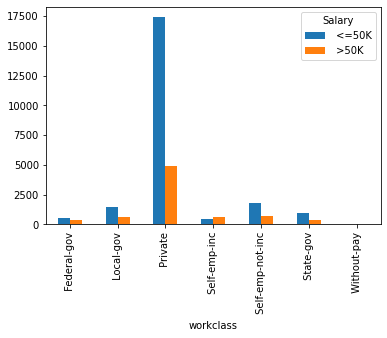

In [177]:
pd.crosstab(train['workclass'],train['Salary']).plot(kind='bar')

<Axes: xlabel='education'>

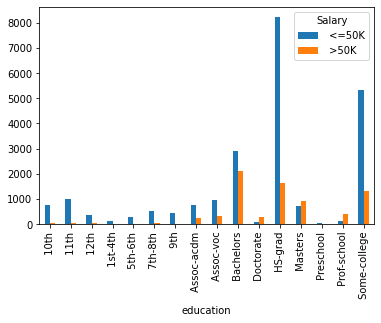

In [178]:
pd.crosstab(train['education'],train['Salary']).plot(kind='bar')

<Axes: xlabel='occupation'>

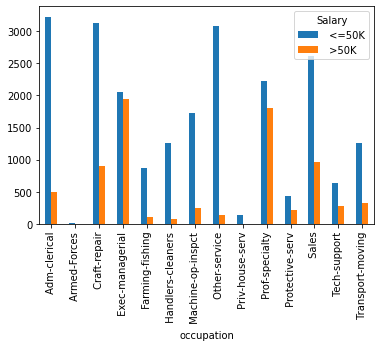

In [179]:
pd.crosstab(train['occupation'],train['Salary']).plot(kind='bar')

<Axes: xlabel='sex'>

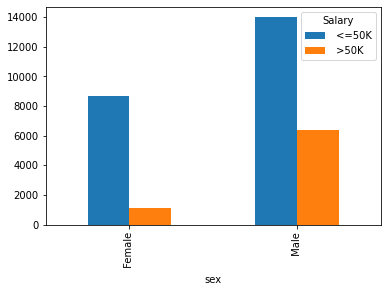

In [180]:
pd.crosstab(train['sex'],train['Salary']).plot(kind='bar')

## Converting categorical data to labels

In [181]:

le= LabelEncoder()


In [182]:
x_test=test[['age','workclass','education','educationno','maritalstatus','occupation','relationship','race','sex','capitalgain','capitalloss','hoursperweek','native']]
y_test=test['Salary']
x_train=train[['age','workclass','education','educationno','maritalstatus','occupation','relationship','race','sex','capitalgain','capitalloss','hoursperweek','native']]
y_train=train['Salary']

In [183]:
x_test=pd.get_dummies(x_test)
x_train=pd.get_dummies(x_train)

In [184]:
x_train.corr()

,age,educationno,capitalgain,capitalloss,hoursperweek,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,...,native_ Portugal,native_ Puerto-Rico,native_ Scotland,native_ South,native_ Taiwan,native_ Thailand,native_ Trinadad&Tobago,native_ United-States,native_ Vietnam,native_ Yugoslavia
age,1.000000,0.043525,0.080152,0.060278,0.101598,0.056623,0.068252,-0.210483,0.111037,0.150425,...,0.001061,0.007835,0.000024,0.001922,-0.007879,-0.004940,0.007867,0.016210,-0.017776,0.000657
educationno,0.043525,1.000000,0.124416,0.079691,0.152522,0.058244,0.097378,-0.165069,0.078843,0.010605,...,-0.043058,-0.042084,0.001815,0.017812,0.049129,0.008183,-0.017134,0.127224,-0.010953,-0.001661
capitalgain,0.080152,0.124416,1.000000,-0.032218,0.080431,-0.006300,-0.009625,-0.048182,0.096481,0.033322,...,-0.003826,-0.006270,-0.002816,-0.002582,0.007639,-0.003502,-0.003603,0.012361,-0.002493,-0.002317
capitalloss,0.060278,0.079691,-0.032218,1.000000,0.052454,0.010416,0.014781,-0.036497,0.031004,0.020282,...,-0.007341,-0.004551,-0.004174,0.005688,0.005688,-0.005189,0.008857,0.015688,0.000352,-0.005034
hoursperweek,0.101598,0.152522,0.080431,0.052454,1.000000,0.005229,0.001611,-0.095532,0.126254,0.087835,...,0.003162,-0.012015,0.000689,0.014327,-0.000305,0.012846,-0.007566,0.010667,-0.010381,0.006983
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
native_ Thailand,-0.004940,0.008183,-0.003502,-0.005189,0.012846,-0.004266,-0.006442,-0.008144,0.018051,0.008065,...,-0.000798,-0.001430,-0.000454,-0.001154,-0.000887,1.000000,-0.000580,-0.076406,-0.001095,-0.000547
native_ Trinadad&Tobago,0.007867,-0.017134,-0.003603,0.008857,-0.007566,-0.004390,-0.001255,0.002165,0.002630,-0.002420,...,-0.000821,-0.001472,-0.000467,-0.001187,-0.000913,-0.000580,1.000000,-0.078622,-0.001127,-0.000563
native_ United-States,0.016210,0.127224,0.012361,0.015688,0.010667,0.017525,0.032914,-0.049755,0.007331,0.014490,...,-0.108085,-0.193767,-0.061455,-0.156286,-0.120145,-0.076406,-0.078622,1.000000,-0.148365,-0.074123
native_ Vietnam,-0.017776,-0.010953,-0.002493,0.000352,-0.010381,-0.000004,-0.003953,0.009370,-0.004973,-0.003405,...,-0.001549,-0.002777,-0.000881,-0.002240,-0.001722,-0.001095,-0.001127,-0.148365,1.000000,-0.001062


In [185]:
y_test=le.fit_transform(y_test)
y_train=le.fit_transform(y_train)

## Normalising Data

In [186]:
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)

In [187]:
x_train = norm_func(x_train)
x_test =  norm_func(x_test)

In [188]:
def convert(data):
  if (data==' >50K'):
    return '1'
  elif(data==' <=50K'):
    return '0'


In [189]:
y_train


array([0, 0, 0, ..., 0, 0, 1])

## SVM Models
We are going to build 3 models
1. Linear
2. Polynomial
3. Radial


### Linear

In [190]:
from sklearn import metrics
from sklearn.metrics import roc_auc_score,auc,classification_report,roc_curve

In [191]:
model_linear = SVC(kernel = "linear",random_state=40,gamma=0.1,C=1.0)
model_linear.fit(x_train,y_train)

SVC(gamma=0.1, kernel='linear', random_state=40)

#### Model Evaluation

In [192]:
pred_test_linear = model_linear.predict(x_test)


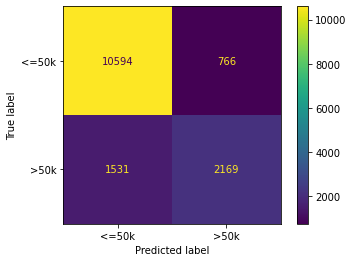

In [193]:
conf_linear= confusion_matrix(y_test,pred_test_linear)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = conf_linear, display_labels = ['<=50k', '>50k'])

cm_display.plot()
plt.show()

In [194]:
print(classification_report(y_test,pred_test_linear))

              precision    recall  f1-score   support

           0       0.87      0.93      0.90     11360
           1       0.74      0.59      0.65      3700

    accuracy                           0.85     15060
   macro avg       0.81      0.76      0.78     15060
weighted avg       0.84      0.85      0.84     15060



Text(0, 0.5, 'True Positive Rate')

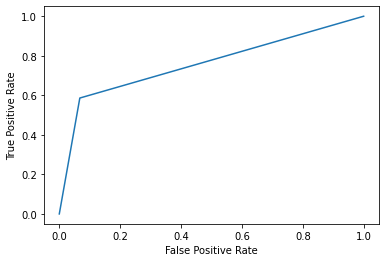

In [195]:
fpr, tpr, thresholds = roc_curve(y_test, pred_test_linear)
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

In [196]:
roc_auc_score(y_test,pred_test_linear)

0.7593933193757139

### Polynomial Model

In [197]:
model_poly = SVC(kernel = "poly",random_state=40,gamma=0.1,C=1.0)
model_poly.fit(x_train,y_train)
pred_test_poly = model_poly.predict(x_test)

#### Model Evaluation

In [198]:
pred_test_poly = model_poly.predict(x_test)


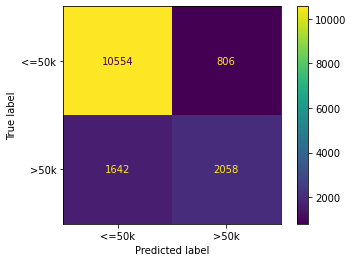

In [199]:
conf_poly= confusion_matrix(y_test,pred_test_poly)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = conf_poly, display_labels = ['<=50k', '>50k'])

cm_display.plot()
plt.show()

In [200]:
print(classification_report(y_test,pred_test_poly))

              precision    recall  f1-score   support

           0       0.87      0.93      0.90     11360
           1       0.72      0.56      0.63      3700

    accuracy                           0.84     15060
   macro avg       0.79      0.74      0.76     15060
weighted avg       0.83      0.84      0.83     15060



Text(0, 0.5, 'True Positive Rate')

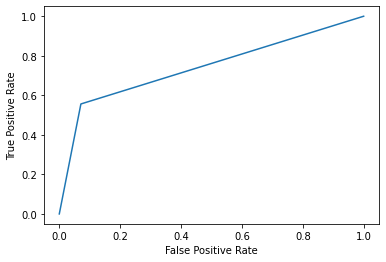

In [201]:
fpr, tpr, thresholds = roc_curve(y_test, pred_test_poly)
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

In [202]:
roc_auc_score(y_test,pred_test_poly)

0.742632755995432

### Radial

In [203]:
model_rbf = SVC(kernel = "rbf",random_state=40,gamma=0.1,C=1.0)
model_rbf.fit(x_train,y_train)

SVC(gamma=0.1, random_state=40)

In [204]:
pred_test_rbf = model_rbf.predict(x_test)

#### Model Evaluation

In [205]:
pred_test_rbf = model_rbf.predict(x_test)


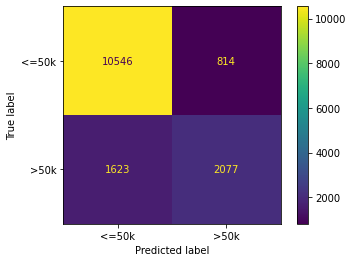

In [206]:
conf_rbf= confusion_matrix(y_test,pred_test_rbf)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = conf_rbf, display_labels = ['<=50k', '>50k'])

cm_display.plot()
plt.show()

In [207]:
print(classification_report(y_test,pred_test_rbf))

              precision    recall  f1-score   support

           0       0.87      0.93      0.90     11360
           1       0.72      0.56      0.63      3700

    accuracy                           0.84     15060
   macro avg       0.79      0.74      0.76     15060
weighted avg       0.83      0.84      0.83     15060



Text(0, 0.5, 'True Positive Rate')

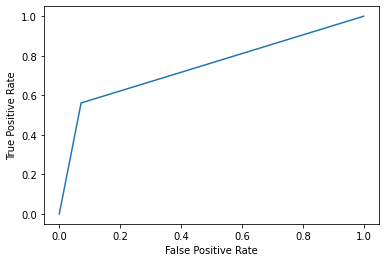

In [208]:
fpr, tpr, thresholds = roc_curve(y_test, pred_test_rbf)
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

In [209]:
roc_auc_score(y_test,pred_test_rbf)

0.7448482108869432

## Conclusion:
1. We first vissualized the data to check the relation of salary with age, sex, occupation, experience to understand the data more.
From the data have concluded that:
  * The people working in private class are more in both the categories
  * There are more number of High school graduates and some college population and are earing more than the other graduates or post graduates.
  * Less people work in the armed services and private house work
  * People working in admin clerical are high but thier salaries are low


2. The data is processed in 3 models of svm (Linear, Polynomial, Radial) 
3. Comparing the Accuracy, F1 scores, AUC-ROC curve we can easily conclude that the linear model fits the best for the data with the highest and best values of Accuracy,AUC-ROC 